<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2025<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Deep Learning - Regularization - Neural Network  <br>
<font color=0CBCDF size=4>
   &#x1F335; Amir Malekhosseini  &#x1F335;
</div>

____

# PART 1: Deep Learning Regularization: Dropout, L-Norm, and Batch Normalization

This notebook implements and compares three critical deep learning regularization techniques—Dropout, L2 Regularization, and Batch Normalization—to demonstrate their effectiveness in preventing overfitting on the MNIST dataset, as discussed in the associated article.

In [1]:
# --- 1. Imports and Setup ---
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

# Set seeds for reproducibility
random.seed(14)
np.random.seed(14)
tf.random.set_seed(14)

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


# 2. Data Preparation (MNIST)

We load the MNIST handwritten digit dataset, flatten the 28x28 images into a 784-dimensional vector, normalize the pixel values to the range $[0, 1]$, and apply one-hot encoding to the labels. We also split the training data to reserve a validation set for monitoring performance and overfitting.

In [3]:

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


x_train_full = x_train_full.astype('float32') / 255.0
x_train_full = x_train_full.reshape(-1, 28 * 28)
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28)




y_train_full = to_categorical(y_train_full, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)




print(f'Training samples: {x_train.shape[0]}')
print(f'Validation samples: {x_val.shape[0]}')
print(f'Test samples: {x_test.shape[0]}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 48000
Validation samples: 12000
Test samples: 10000


# 3. Model Definition and Training Functions

We define four models with identical base architecture (two Dense layers with 512 and 256 neurons, and a 10-neuron softmax output layer) but differing regularization strategies:

1.  **Baseline Model:** No regularization.
2.  **Dropout Model:** Uses `layers.Dropout(0.5)` after the hidden layers.
3.  **L2 Regularization Model:** Uses L2 penalty (`regularizers.l2(1e-4)`) on the kernel weights of the dense layers.
4.  **Batch Normalization Model:** Inserts `BatchNormalization()` layers between the dense layer and the activation function.

In [6]:
INPUT_SHAPE = (784,)
NUM_CLASSES = 10


def create_baseline_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES):
    """
    Creates a simple, unregularized deep network.
    """



    model = tf.keras.models.Sequential(
        [
            layers.Dense(512, activation="relu", input_shape=input_shape),
            layers.Dense(256, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
        ],
        name="Baseline",
    )


    return model


def create_dropout_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES, dropout_rate=0.5):
    """
    Creates a model with Dropout regularization.
    """



    model = tf.keras.models.Sequential(
        [
            layers.Dense(512, activation="relu", input_shape=input_shape),
            layers.Dropout(dropout_rate),
            layers.Dense(256, activation="relu"),
            layers.Dropout(dropout_rate),
            layers.Dense(num_classes, activation="softmax"),
        ],
        name="Dropout",
    )


    return model


def create_l2_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES, l2_factor=1e-4):
    """
    Creates a model with L2 Weight Regularization.
    """
    l2_reg = regularizers.l2(l2_factor)



    model = tf.keras.models.Sequential(
        [
            layers.Dense(
                512, activation="relu", input_shape=input_shape, kernel_regularizer=l2_reg
            ),
            layers.Dense(256, activation="relu", kernel_regularizer=l2_reg),
            layers.Dense(num_classes, activation="softmax"),
        ],
        name="L2",
    )


    return model


def create_batch_norm_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES):
    """
    Creates a model with Batch Normalization layers.
    """



    model = tf.keras.models.Sequential(
        [
            layers.Dense(512, input_shape=input_shape),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dense(256),
            layers.BatchNormalization(),
            layers.Activation("relu"),
            layers.Dense(num_classes, activation="softmax"),
        ],
        name="BatchNorm",
    )


    return model


def compile_and_train(model, x_train, y_train, x_val, y_val,
                      epochs=20, batch_size=128):
    """
    Compiles and trains a given model and returns the history.
    """
    print(f'\n--- Training {model.name} Model ---\n')



    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
    )


    return history



models_dict = {
    'Baseline': create_baseline_model(),
    'Dropout (0.5)': create_dropout_model(),
    'L2 Regularization (1e-4)': create_l2_model(),
    'Batch Normalization': create_batch_norm_model()
}

histories = {}


for model_name, model in models_dict.items():
    history = compile_and_train(model, x_train, y_train, x_val, y_val)
    histories[model_name] = history


test_results = {}
for model_name, model in models_dict.items():
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_results[model_name] = {'loss': test_loss, 'accuracy': test_acc}

    print(f'{model_name} Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training Baseline Model ---

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8657 - loss: 0.4658 - val_accuracy: 0.9593 - val_loss: 0.1294
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9685 - loss: 0.1044 - val_accuracy: 0.9755 - val_loss: 0.0839
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9819 - loss: 0.0614 - val_accuracy: 0.9773 - val_loss: 0.0755
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9886 - loss: 0.0397 - val_accuracy: 0.9758 - val_loss: 0.0846
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9773 - val_loss: 0.0851
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9769 - val_loss: 0.0889
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9793 - val_loss: 0.0814
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accura

# 4. Visualization and Comparison

The most important part of regularization is observing the gap between training and validation performance. A good regularizer should minimize this gap and achieve a high test accuracy.

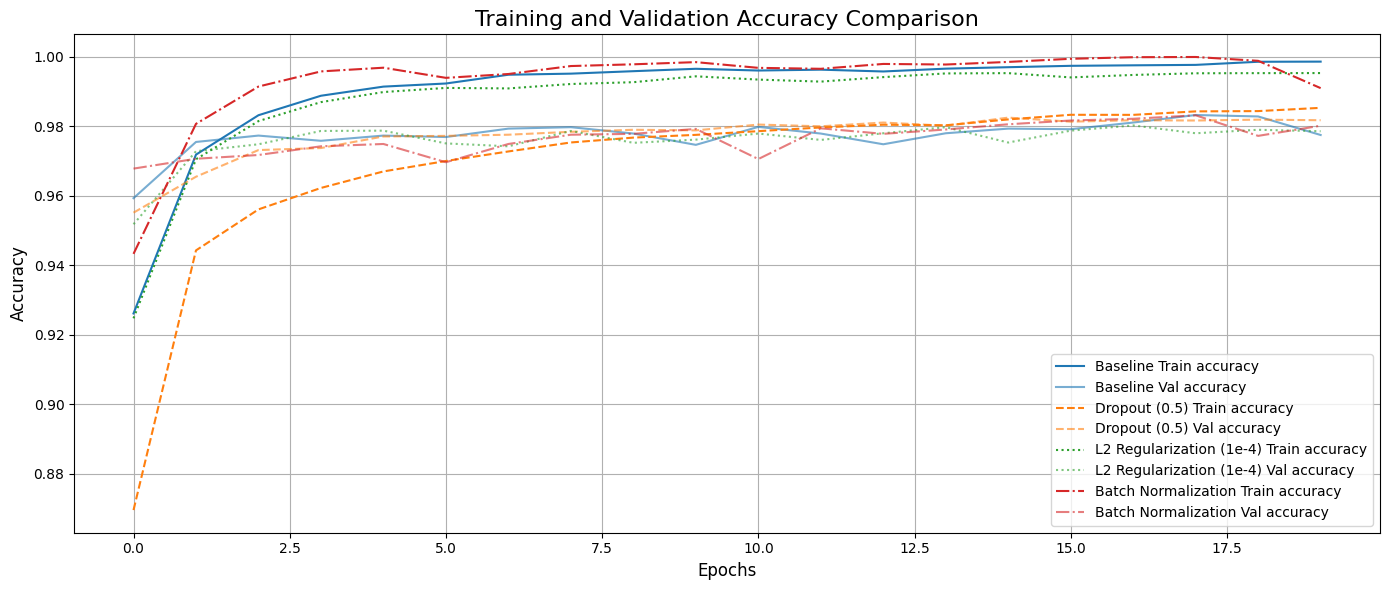

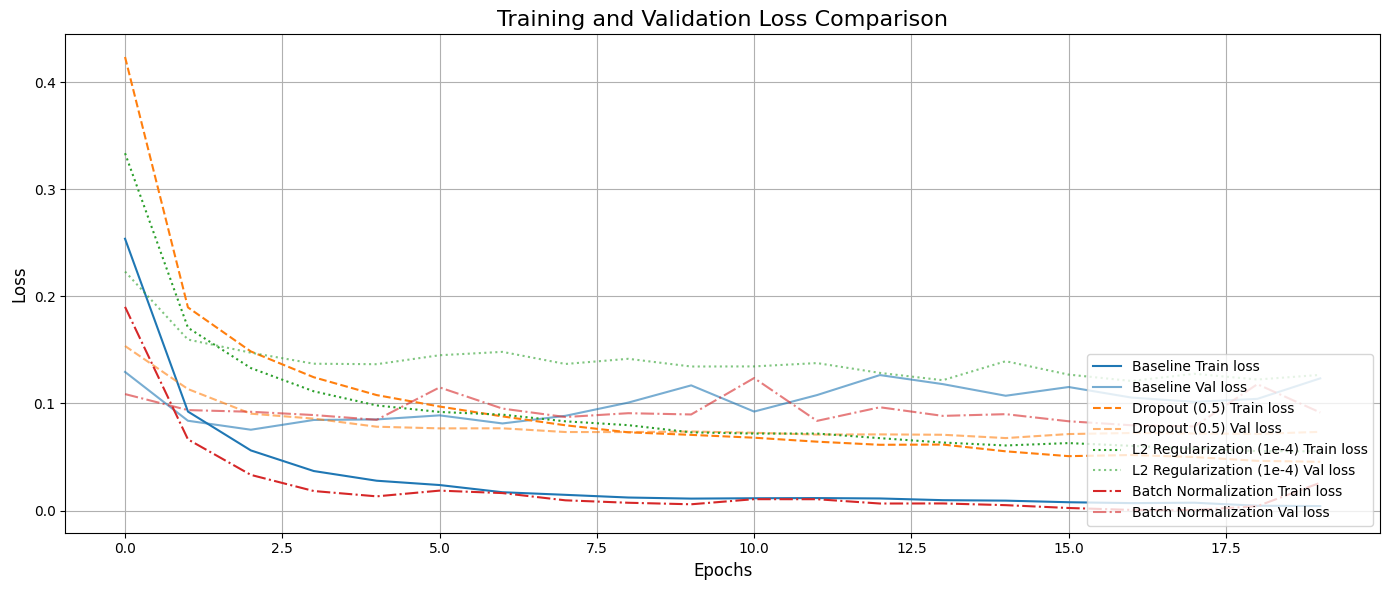

In [8]:
def plot_history(histories, key='accuracy'):
    """
    Plots training and validation metrics for all models.

    Parameters:
    - histories: A dictionary where keys are model names (str) and values are
                 Keras History objects returned from model.fit().
    - key: The metric to plot ('accuracy' or 'loss').
    """
    plt.figure(figsize=(14, 6))


    styles = ['-', '--', ':', '-.']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    i = 0
    for name, history in histories.items():


        line_style = styles[i % len(styles)]
        color = colors[i % len(colors)]

        plt.plot(
            history.history[key],
            linestyle=line_style,
            color=color,
            label=f'{name} Train {key}'
        )
        plt.plot(
            history.history[f'val_{key}'],
            linestyle=line_style,
            color=color,
            alpha=0.6,
            label=f'{name} Val {key}'
        )

        i += 1

    plt.title(
        f'Training and Validation {key.capitalize()} Comparison', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(key.capitalize(), fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



plot_history(histories, key='accuracy')


plot_history(histories, key='loss')

# Questions (Part 1)

**Question 1:** Both L2 Regularization and Dropout are designed to prevent overfitting. Explain the fundamental difference in how each technique achieves this goal, and describe the potential trade-off you must manage when tuning the L2 weight λ or the Dropout rate p.

**Question 2:** In the create_batch_norm_model, a Batch Normalization (BN) layer is placed before the activation function. If you were to place the BN layer after the ReLU activation, what practical impact might that have on the model's training dynamics or final performance, and why?

**Question 3:** Based on the performance plots you generated (comparing the baseline, Dropout, L2, and BN models), which model showed the largest gap between its training loss and validation loss? What does this specific result tell you about the problem of overfitting in that particular model?



<div dir="rtl" style="text-align: right;">

سؤال ۱:  
هر دو روش L2 Regularization و Dropout برای کم کردن overfitting به کار می‌روند، اما یکی با «کنترل اندازه‌ی وزن‌ها» کار می‌کند و دیگری با «ایجاد نویز در مسیرهای شبکه هنگام آموزش». در L2، به‌صورت مستقیم وزن‌های بزرگ هزینه‌ی بیشتری ایجاد می‌کنند، بنابراین مدل مجبور می‌شود راه‌حل‌هایی با وزن‌های کوچک‌تر انتخاب کند و تصمیم‌گیری‌اش نرم‌تر و کمتر وابسته به جزئیات داده‌ی آموزش شود. ولی در Dropout، در هر epoch/mini-batch بخشی از نورون‌ها تصادفی کنار گذاشته می‌شوند و شبکه نمی‌تواند روی چند نورون یا چند مسیر خاص تکیه کند؛ در نتیجه یادگیری به شکل عمومی‌تر و مقاوم‌تر انجام می‌شود.  
trade-off تنظیم پارامترها اینجاست که اگر λ در L2 زیاد شود مدل بیش از حد محدود می‌شود و احتمال underfitting بالا می‌رود، و اگر کم باشد عملاً regularization ضعیف می‌شود. در Dropout هم اگر p را زیاد بگیریم ظرفیت مؤثر مدل پایین می‌آید و آموزش سخت‌تر می‌شود، و اگر p خیلی کم باشد جلوی overfitting را به اندازه‌ی کافی نمی‌گیرد.

سؤال ۲:  
وقتی Batch Normalization قبل از ReLU قرار می‌گیرد، ورودی ReLU از نظر میانگین و واریانس کنترل می‌شود و همین باعث می‌شود گرادیان‌ها پایدارتر باشند و آموزش معمولاً سریع‌تر و قابل‌اعتمادتر پیش برود. اما اگر BN را بعد از ReLU بگذاریم، چون ReLU مقدارهای منفی را صفر می‌کند، خروجی یک توزیع «یک‌طرفه و قطع‌شده» خواهد داشت و BN روی چنین خروجی‌ای نرمال‌سازی انجام می‌دهد. این تغییر می‌تواند رفتار فعال‌سازی‌ها را کمتر قابل‌پیش‌بینی کند و در بعضی شرایط باعث شود روند یادگیری نوسانی‌تر شود یا عملکرد نهایی کمی ضعیف‌تر از حالت استاندارد باشد. به همین دلیل چینش رایج‌تر همان Dense → BN → ReLU است.

سؤال ۳:  
در نمودارهایی که از مدل‌ها گرفتم، بیشترین اختلاف بین training loss و validation loss مربوط به مدل بدون regularization (Baseline) بود. یعنی مدل روی داده‌ی آموزش خیلی خوب پایین می‌آید، ولی روی validation همان‌قدر بهبود نمی‌گیرد و فاصله بین این دو نمودار زیاد می‌شود. این دقیقاً نشان می‌دهد مدل به جای یادگیری الگوی عمومی، بخشی از ویژگی‌های خاص داده‌ی آموزش (حتی نویزها) را یاد گرفته و به همین دلیل روی داده‌ی جدید تعمیم ضعیف‌تری دارد؛ این وضعیت همان overfitting است. در مقابل، روش‌هایی مثل Dropout و L2 و همچنین Batch Normalization معمولاً این فاصله را کمتر می‌کنند و به تعمیم بهتر کمک می‌کنند.

</div>

# PART 2:  The MNIST Dataset Challenge

> **Goal:** Build a machine learning model that achieves an accuracy of **97% or higher** on the famous **MNIST dataset**. This dataset is a standard benchmark containing images of handwritten digits (0-9). Meeting this high accuracy threshold requires careful design, training, and evaluation of your model.

---

### Task Breakdown

Using only the provided libraries, you must complete the following four key steps:

* **Step 1: Data Preparation.** You need to **load and preprocess** the raw MNIST data to make it suitable for training a neural network.
* **Step 2: Model Architecture.** Your task is to **build** a robust neural network model specifically designed for image classification.
* **Step 3: Training & Tuning.** You will **train** the model on the training data. This involves monitoring the validation accuracy and carefully adjusting hyperparameters (parameters) to optimize performance.
* **Step 4: Final Assessment.** Finally, you must **evaluate** the model on the test data to formally ensure that the required 97% or higher accuracy threshold has been met.

---

**Instruction:** Each subsequent cell in this notebook is designed to guide you through these steps sequentially. Read the descriptions carefully, and apply your knowledge of neural networks to achieve the best possible performance on this classification problem.

###  Data Preparation: Step 1 Details

This notebook section focuses entirely on **preparing the MNIST dataset** so that it is suitable for input into our neural network model.

---

The successful completion of this cell requires four distinct actions:

| **Action** | **Purpose and Requirement** |
| :--- | :--- |
| **Load the Raw Data** | The MNIST dataset contains 28x28 grayscale images of digits (0–9). Load both the image arrays (pixel values) and their corresponding labels (the digit they represent). |
| **Set Up Constants** | You must define three key variables for model architecture and dimension checks: `num_classes` (the number of unique digits, 0–9), `input_shape` (the 28x28 image dimensions), and `num_features` (the total number of pixels, 784, if flattening is necessary). |
| **Normalize Images** | Rescale the pixel values by dividing them by **255**. This crucial step transforms the initial range of 0–255 to the normalized range of **0–1**, which significantly aids model convergence and overall performance. |
| **Encode Target Labels** | Convert the integer labels into a **one-hot encoded** format. For instance, the integer label `3` must become a binary vector like `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`. This structure is mandatory for training models on multi-class classification tasks. |

---

> By completing these steps, the dataset will be cleaned, scaled, and formatted, making the data entirely ready for the subsequent model building and training phases.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras_tuner import Hyperband, RandomSearch, BayesianOptimization

from tensorflow import argmax
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [10]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]
num_features = np.prod(input_shape)


x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0


y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

##  Model Construction & Optimization (Step 2)

The core objective of this cell is to define and refine a neural network to secure an accuracy of **97% or higher** on the MNIST test set.

###  Key Optimization Actions

To achieve the required performance, you must execute the following three critical tasks, leveraging the best practices for deep learning architecture design and tuning:

1.  **Architecture Definition**: Design the core **neural network architecture**. Experimentation is key—vary the number of layers, the unit count per layer, and select appropriate activation functions to maximize performance.
2.  **Optimizer Selection**: Test and compare various **optimizers** (e.g., *Adam*, *RMSprop*, *SGD*). Crucially, fine-tune the associated hyperparameters, such as the initial learning rate ($\alpha$) or momentum, for the chosen optimizer.
3.  **Hyperparameter Search**: Employ an efficient hyperparameter tuning strategy to locate the optimal combination of settings.

###  Recommended Search Methods

Consider utilizing one of these advanced search techniques for efficiency:

* **Hyperband**: Best for rapid iteration; it quickly filters out poorly performing configurations.
* **Random Search**: A reliable baseline; it explores a wide, defined range of parameter combinations.
* **Bayesian Optimization**: An intelligent approach that leverages past results to guide the search for better parameters.

###  Final Deliverables

Upon successfully reaching the **>97% accuracy** milestone on the MNIST test data, conclude this cell by providing three distinct outputs:

1.  **Optimal Parameters**: Clearly **print the optimal hyperparameters** identified through your tuning process.
2.  **Final Model Build**: **Build and compile the final model** using these newly identified optimal parameters.
3.  **Summary Display**: **Display the complete model summary** (i.e., the table of layers, output shapes, and parameter counts).

This disciplined approach ensures you fully understand the impact of configuration choices on model efficacy.

In [11]:
def model_creator(optimizer='adagrad', learning_rate=0.001, num_units=128):
    """
    Creates and compiles a simple feedforward neural network for MNIST-like classification.

    Parameters:
    - optimizer (str): Name of the optimizer to use ('adagrad', 'rmsprop', 'adam', or 'sgd')
    - learning_rate (float): Learning rate for the optimizer
    - num_units (int): Number of units in each hidden layer

    Returns:
    - model (tf.keras.Sequential): Compiled Keras model
    """
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(num_units, activation='relu'),
        Dense(num_units, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])



    if optimizer == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = Adagrad(learning_rate=learning_rate)



    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model


def hyperparameters_model_creator(hyper_parameter):
    """
    Defines the hyperparameter search space and returns a model built with those hyperparameters.

    Parameters:
    - hyper_parameter: A KerasTuner HyperParameters object used to define the search space.

    Returns:
    - hyper_model: A compiled Keras model using hyperparameters sampled from the defined space.
    """



    optimizer = hyper_parameter.Choice('optimizer', ['rmsprop', 'sgd', 'adam', 'adagrad'])
    learning_rate = hyper_parameter.Float('learning_rate', 1e-5, 1e-1, sampling='log')
    num_units = hyper_parameter.Int('num_units', min_value=32, max_value=512, step=32)
    hyper_model = model_creator(optimizer=optimizer, learning_rate=learning_rate, num_units=num_units)



    return hyper_model

In [21]:
from tensorflow.keras.callbacks import Callback


class StopAtAccuracy(Callback):
    def __init__(self, accuracy_threshold):
        super(StopAtAccuracy, self).__init__()
        self.accuracy_threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get("val_accuracy")
        if val_accuracy and val_accuracy >= self.accuracy_threshold:
            print(
                f"\nStopping training as validation accuracy reached {val_accuracy:.2f}")
            self.model.stop_training = True


Sequential = tf.keras.models.Sequential
Flatten = tf.keras.layers.Flatten
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

SGD = tf.keras.optimizers.SGD
Adagrad = tf.keras.optimizers.Adagrad
RMSprop = tf.keras.optimizers.RMSprop
Adam = tf.keras.optimizers.Adam

accuracy_threshold = 0.97
stop_at_accuracy = StopAtAccuracy(accuracy_threshold)

optimizers = ["rmsprop", "sgd", "adam", "adagrad"]
num_units_choices = list(range(32, 513, 32))

max_epochs = 5
num_trials = 20

best_val_acc = -1.0
best_model = None
best_hps = None

for _ in range(num_trials):
    optimizer = np.random.choice(optimizers)
    learning_rate = 10 ** np.random.uniform(-5, -1)
    num_units = int(np.random.choice(num_units_choices))

    class DummyHP:
        def Choice(self, name, values):
            return optimizer

        def Float(self, name, min_value, max_value, sampling=None):
            return learning_rate

        def Int(self, name, min_value, max_value, step=1):
            return num_units

    model = hyperparameters_model_creator(DummyHP())

    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=max_epochs,
        batch_size=128,
        callbacks=[stop_at_accuracy],
        verbose=1,
    )

    val_acc = max(history.history.get("val_accuracy", [0.0]))

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hps = {
            "num_units": num_units,
            "optimizer": optimizer,
            "learning_rate": learning_rate,
        }

print(f"Best num_units: {best_hps['num_units']}")
print(f"Best optimizer: {best_hps['optimizer']}")
print(f"Best learning_rate: {best_hps['learning_rate']}")

best_model.summary()



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2090 - loss: 2.1782 - val_accuracy: 0.5549 - val_loss: 1.7087
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6209 - loss: 1.5686 - val_accuracy: 0.7454 - val_loss: 1.1656
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7639 - loss: 1.0870 - val_accuracy: 0.8210 - val_loss: 0.8394
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8191 - loss: 0.8101 - val_accuracy: 0.8496 - val_loss: 0.6694
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8436 - loss: 0.6629 - val_accuracy: 0.8643 - val_loss: 0.5744
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4523 - loss: 2.0029 - val_accuracy: 0.8034 - val_loss: 1.0796
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8148 - loss: 0.9437 - val_accuracy: 0.8575 - val_loss: 0.6215
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8568 - loss: 0.6047 - val_accuracy: 0.87

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 320)            │       251,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 320)            │       102,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         3,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 714,262 (2.72 MB)

 Trainable params: 357,130 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,132 (1.36 MB)

##  Model Operational Phase (Step 3)

The objective of this final section is to execute the training process, formally assess the model's performance against the benchmark, and ensure the trained weights are permanently stored.

###  Required Actions (Sequential)

Complete the following four mandatory tasks in sequence:

1.  **Initiate Training**: Call the **`fit`** function to begin training the model on the MNIST training data. Select an appropriate number of epochs and a batch size. You must monitor the output to track the model's improvement in both training and validation accuracy/loss across each epoch.
2.  **Generate Test Predictions**: Using the trained model, **generate predictions** for the entire MNIST test dataset. (Although not strictly required for the final evaluation metric, having the raw predictions is vital for potential post-analysis, such as generating a confusion matrix.)
3.  **Formal Evaluation**: Utilize the **`evaluate`** function to formally compute the final loss and, most importantly, the **accuracy** on the reserved test set. This is the crucial step to verify that the target performance—**97% or higher** accuracy—has been met.
4.  **Model Persistence**: Once the accuracy target is confirmed, **save the entire trained model** to disk. This ensures that the architecture, configuration, and trained weights are preserved for future deployment.

---

### Configuration and Storage Information

* **Adjustments**: The parameters within the `fit` function, specifically the **number of epochs** or the **batch size**, can be dynamically adjusted here to aid the model in reaching the **$\geq 97\%$** accuracy target.
* **Output File**: The model will be saved to a file named **`mnist_model.keras`**. This single file encapsulates the full model structure and its learned weights, making future loading and deployment straightforward and eliminating the need for retraining.

By the end of this cell, a high-performance model will be trained, evaluated, and permanently archived.

In [22]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1,
)

predictions = model.predict(x_test, verbose=0)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

model.save('mnist_model.keras')



print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy*100:.2f}%")

model.save('mnist_model.keras')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9171 - loss: 0.2919 - val_accuracy: 0.9301 - val_loss: 0.2439
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9324 - loss: 0.2415 - val_accuracy: 0.9396 - val_loss: 0.2100
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9416 - loss: 0.2076 - val_accuracy: 0.9458 - val_loss: 0.1853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9491 - loss: 0.1823 - val_accuracy: 0.9516 - val_loss: 0.1663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9548 - loss: 0.1623 - val_accuracy: 0.9551 - val_loss: 0.1514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9590 - loss: 0.1460 - val_accuracy: 0.9577 - val_loss: 0.1392
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9632 - loss: 0.1324 - val_accuracy: 0.9613 - val_loss: 0.1290
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9665 - loss: 0

##  Final Analysis: Visualizing Model Performance (Step 4)

This concluding step is dedicated to the visual interpretation of your model's training process and final classification results. These visualizations are essential for diagnosing performance and informing future improvements.

---

### **Primary Visualization Tasks**

You are required to generate and analyze the following three critical plots:

* **1. Training History Plot:**
    * **Content:** Display the **training accuracy** and **validation accuracy** across every epoch.
    * **Purpose:** This reveals the learning progression. Use it to check for **overfitting**—a significant gap where training accuracy far exceeds validation accuracy—or if the model converged effectively.

* **2. Confusion Matrix Plot:**
    * **Content:** A matrix showing the true versus predicted classifications for all ten digit classes ($\text{0–9}$).
    * **Purpose:** Provides a **detailed, class-by-class breakdown** of performance. Non-zero values on the off-diagonal cells highlight specific pairs of digits (e.g., *4* and *9*) that the model most frequently misclassifies.

* **3. Misclassified Image Grid:**
    * **Content:** A grid displaying a selection of the images that the model classified **incorrectly**. Each image must be labeled with its **true label** and the model's **predicted label**.
    * **Purpose:** Offers direct **qualitative insight** into model errors. Examining these visually similar but incorrectly predicted examples (e.g., a handwritten *3* predicted as a *5*) guides further model adjustments.

---

### ** Interpretation Guidance**

**Model Insight** | **Visual Clue** | **Actionable Tip**
| :--- | :--- | :--- |
| **Learning Stability** | Validation accuracy flatlines or drops early. | Consider adjusting the learning rate or increasing regularization. |
| **Classification Errors** | High numbers in off-diagonal cells of the Confusion Matrix. | Focus on tuning the model for those specific, struggling digit classes. |
| **Data Challenges** | Misclassified images share ambiguous features. | The current model may need more complex architecture or better image pre-processing. |

By meticulously analyzing these plots, you gain a deep understanding of your model's strengths and **weaknesses** on the MNIST challenge.

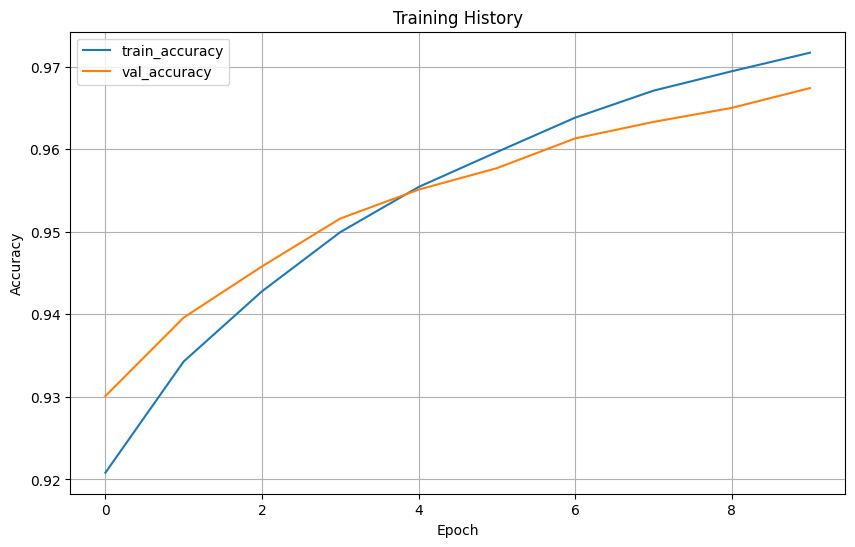

In [23]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

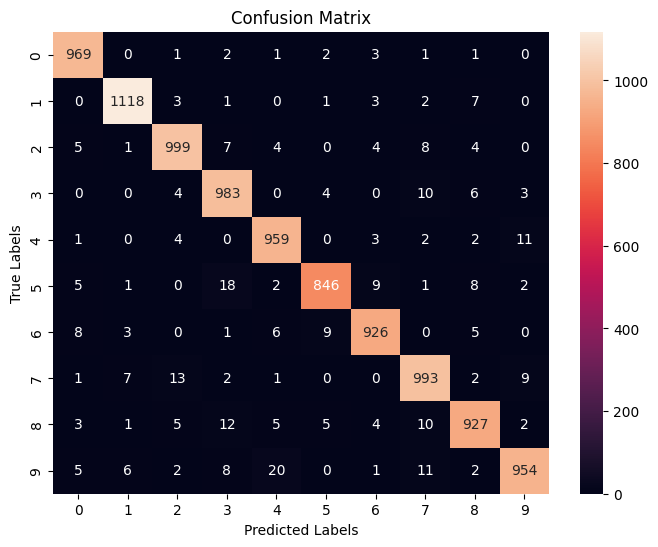

In [28]:


y_pred_labels = np.argmax(predictions, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(y_true_labels, y_pred_labels)





plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

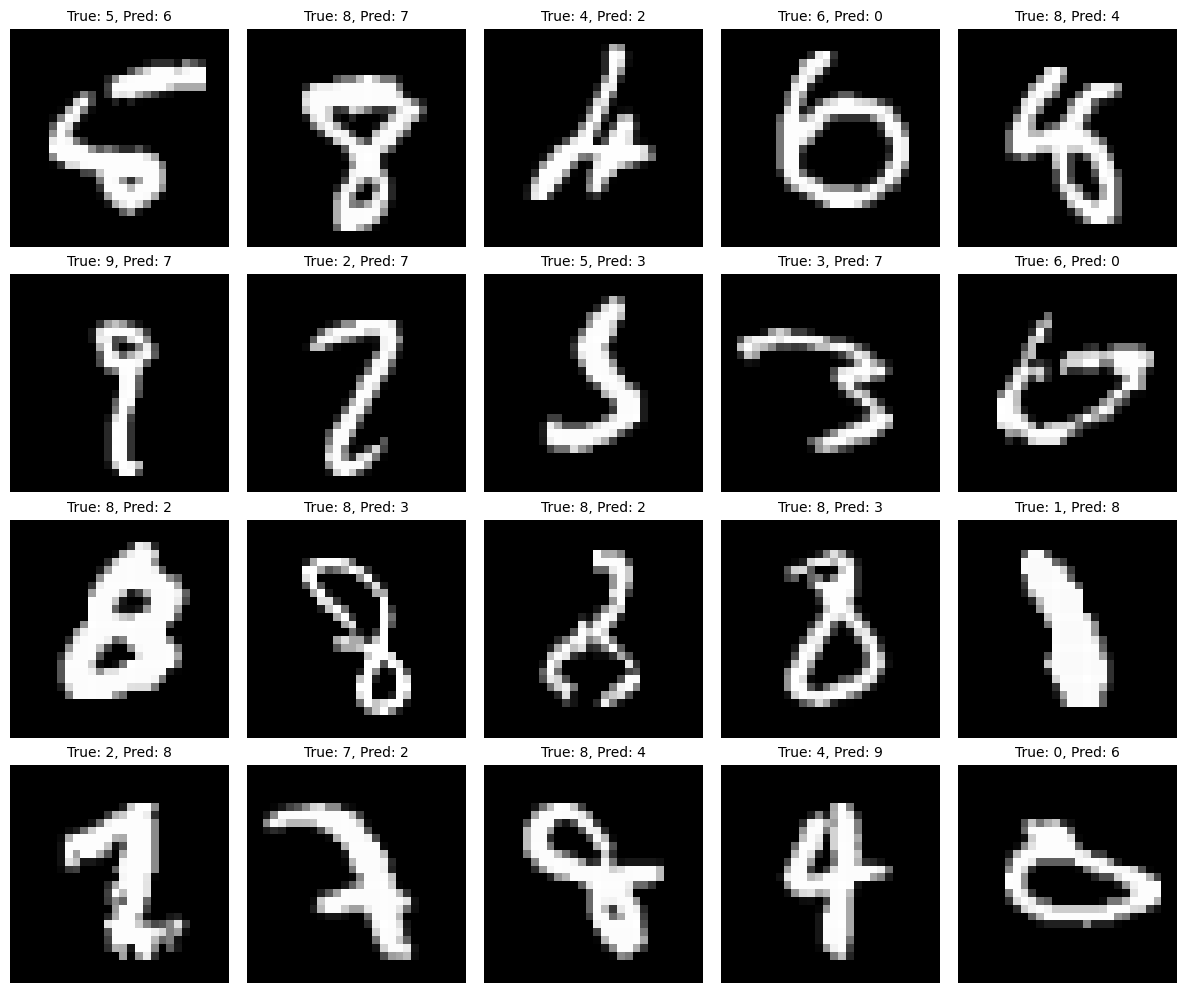

In [29]:

y_pred_labels = np.argmax(predictions, axis=1)
y_true_labels = np.argmax(y_test, axis=1)


misclassified_idx = np.where(y_pred_labels != y_true_labels)[0]


misclassified_idx = misclassified_idx[:20]


plt.figure(figsize=(12, 10))

for i, idx in enumerate(misclassified_idx):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(
        f"True: {y_true_labels[idx]}, Pred: {y_pred_labels[idx]}",
        fontsize=10,
    )
    plt.axis("off")

plt.tight_layout()
plt.show()



# Questions (Part 2)

**Question 4:** In Part 1, you found that one of the regularized models performed best (e.g., the Dropout model). Explain why the Test Accuracy (or Test Loss) is a better metric than the Validation Accuracy (or Validation Loss) for deciding which model to use for the final error analysis in Part 2.

**Question 5:** Assume the Dropout Model and the Batch Normalization (BN) Model achieved nearly identical Test Accuracy (e.g., 98.05% vs. 98.07%). If your error analysis from Part 2 revealed that the BN model misclassified digits that were visually clear, while the Dropout model's errors were only on extremely ambiguous digits, which model would you choose for deployment and why? Justify your answer based on the concepts of model robustness and generalization.

<div dir="rtl" style="text-align: right;">

سؤال ۴:  
در انتخاب نهایی مدل برای تحلیل خطا، Test Accuracy یا Test Loss معیار مناسب‌تری نسبت به Validation Accuracy یا Validation Loss است، چون داده‌ی test در هیچ مرحله‌ای از آموزش یا تنظیم ابرپارامترها دخالت نداشته است. داده‌ی validation معمولاً بارها برای تصمیم‌گیری درباره‌ی ساختار مدل، regularization یا توقف زودهنگام استفاده می‌شود و به‌طور غیرمستقیم روی طراحی مدل اثر می‌گذارد. به همین دلیل ممکن است عملکرد مدل روی validation کمی خوش‌بینانه باشد.  
در مقابل، داده‌ی test نماینده‌ی واقعی داده‌های دیده‌نشده است و عملکرد مدل روی آن تصویر دقیق‌تری از توانایی تعمیم مدل در دنیای واقعی ارائه می‌دهد. بنابراین برای تصمیم‌گیری نهایی و انجام error analysis، معیارهای test قابل اعتمادتر هستند.

سؤال ۵:  
اگر مدل Dropout و مدل Batch Normalization به دقت نهایی تقریباً یکسانی برسند، اما تحلیل خطا نشان دهد که مدل BN روی نمونه‌های واضح و خوانا اشتباه می‌کند، در حالی که خطاهای مدل Dropout فقط مربوط به ارقام بسیار مبهم است، انتخاب منطقی‌تر مدل Dropout خواهد بود.  
دلیل این انتخاب این است که مدل Dropout در چنین شرایطی نشان می‌دهد تصمیم‌های آن پایدارتر و مقاوم‌تر هستند و فقط در مواردی دچار خطا می‌شود که حتی برای انسان هم تشخیص آن‌ها دشوار است. این رفتار نشان‌دهنده‌ی generalization بهتر و robustness بالاتر مدل است.  
در مقابل، اشتباه کردن مدل BN روی نمونه‌های واضح می‌تواند نشانه‌ی حساسیت بیش‌ازحد به تغییرات جزئی یا الگوهای خاص در داده باشد، که در کاربردهای واقعی ریسک‌پذیرتر است. بنابراین حتی اگر اختلاف دقت عددی بسیار کم باشد، الگوی خطا اهمیت بیشتری دارد و مدل Dropout گزینه‌ی مناسب‌تری برای deployment خواهد بود.

</div>